<a href="https://colab.research.google.com/github/sazzy438/Class_Notes/blob/main/10_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
a = 5
b = a
print (a, b)    # 5 5
a = 8
print (a, b)    # 8 5

5 5
8 5


In [ ]:
lsta = [5, 9, 2]
lstb = lsta
print (lsta)    # [5, 9, 2]
print (lstb)    # [5, 9, 2]
lsta[0] = 8
print (lsta)    # [8, 9, 2]
print (lstb)    # [8, 9, 2], not [5, 9 ,2]

[5, 9, 2]
[5, 9, 2]
[8, 9, 2]
[8, 9, 2]


In [ ]:
lst = [[1, 2, 3],
       [5, 6, 7, 8, 4, 7, 6],
       [8, 1, 2, 2, 9]]

for elem in lst:
  print (len (elem))

3
7
5


In [ ]:
# If the right side of = is a "simple" or primitive type, like
# int, bool, Nonetype, then Python will copy the value on the
# right side to the variable on the left side

# But if the right side of = is a "complicated" or non-primitive
# type, like list or every user-defined classes, then Python will
# NOT copy the value of the right side, but will instead assign
# the variable name on the left as another name for the value

In [ ]:
lsta = [5, 9, 2]
#lstb = list (lsta)   # one way to copy a list
#lstb = lsta[:]        # another way to copy a list
lstb = lsta.copy ()   # another way to copy a list
print (lsta)    # [5, 9, 2]
print (lstb)    # [5, 9, 2]
lsta[0] = 8
print (lsta)    # [8, 9, 2]
print (lstb)    # [5, 9, 2]

[5, 9, 2]
[5, 9, 2]
[8, 9, 2]
[5, 9, 2]


In [ ]:
# I want a structure with the values 5, 9, 2
# but this structure should allow efficient insert at
# the beginning, and deletion at the beginning

# In a Linked List structure, we allow the elements to be
# anywhere in the memory, even if they are not next to each
# other. However, for each element, we reserve two memory locations:
# one for the actual data, and another to find the next element

# If we can keep track of the first element only (known as the head),
# we can find ALL other elements

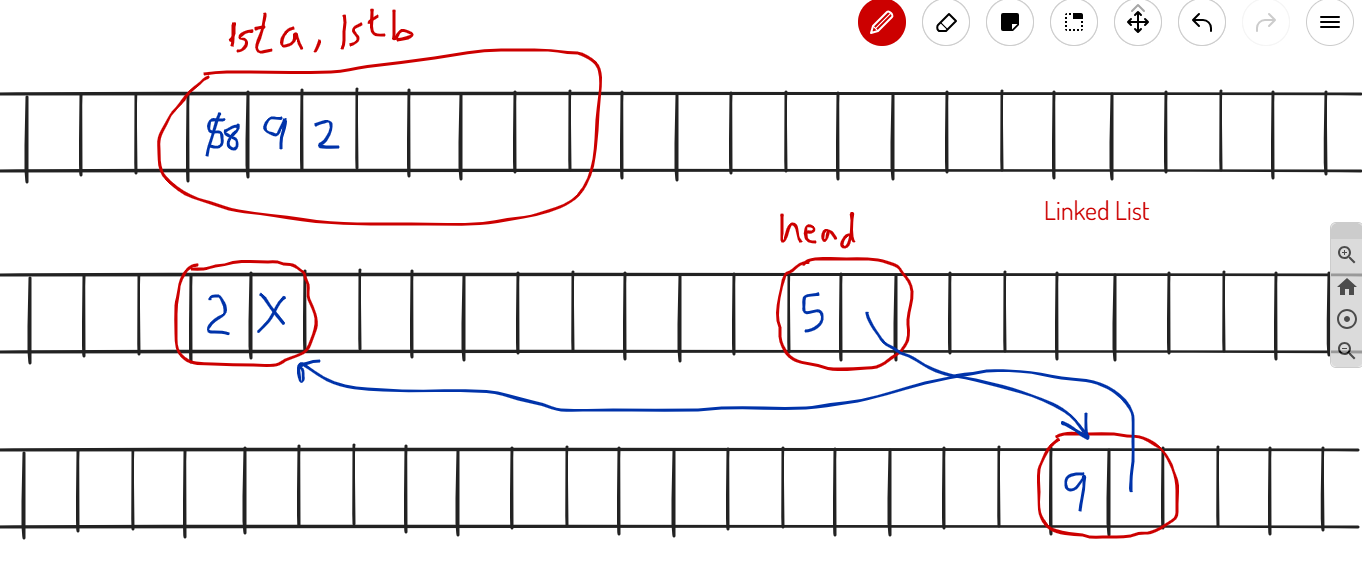

In [ ]:
# Before we consider designing a type for the entire structure,
# we should first design a type for a single element alone
# (which has two components)

class SLLNode:    # SLL stands for Singly-Linked List
  def __init__ (self, dt, nx = None):
    self.data = dt
    self.next = nx

    # In general, try to be aware of the types for all variables
    # and objects
    # self : SLLNode
    # self.data : anything, but usually int
    # self.next : SLLNode, or None


In [ ]:
nd1 = SLLNode (5)
print (nd1.data)    # 5
print (nd1.next)    # None
print (nd1)
# Python doesn't know how to print a node, so it just specifies
# its type and location

nd2 = SLLNode (9)
print (nd2.data)    # 9
print (nd2.next)    # None
print (nd1.next)    # None

5
None
9
None
None


In [ ]:
# We want nd1 to connect to nd2
nd1.next = nd2

print (nd1.next)    # 9? SLLNode object at..
print (nd1.next.data)   # 9
print (nd1.next.next)   # None
# print (nd1.next.next.data)    # AttributeError

9
None


In [ ]:
nd2.next = SLLNode (2)
# 5 -> 9 -> 2
print (nd2.next.data)   # 2
print (nd2.next.next)   # None
print (nd1.next.next.next)    # None
print (nd1.next.next.data)    # 2
# print (nd3.data)              # NameError

# the only SLLNode that we actually need a variable name for
# is nd1, i.e., the first node
# This is known as the head node
# We don't need a name for the second node, because we can access
# it as nd1.next
# We don't need a name for the third node, because we can access
# it as nd1.next.next
# And so on

2
None
None
2


In [ ]:
# Design a class for the ENTIRE linked list structure

class SinglyLinkedList:
  def __init__ (self):
    self.head = None    # None means the SLL is empty

    # self.head : SLLNode or None

In [ ]:
sll = SinglyLinkedList ()
sll.head = nd1
# 5 -> 9 -> 2
print (sll.head.data)   # 5
print (sll.head.next.next.data)   # 2
#print (sll.next.data)       # AttributeError

# The number of times you write .next matches the index
# number in the list type
# sll.head.next.next.next.next.next is like index 5 in a list

5
2


In [ ]:
# [OPTIONAL]
print (x.data)      # 5
print (x.next)      # None
# Now I somehow magically delete the 5
# Maybe x changes to None
# Now I want to add 7 to x

In [ ]:
# let's update the SinglyLinkedList class with some methods

class SinglyLinkedList:
  def __init__ (self):
    self.head = None    # None means the SLL is empty

  # to check if a LL is empty or not, simply check if self.head == None

  # we want to add a node with data x to the start of the LL
  def appendleft (self, x):
    if self.head == None:     # check if SLL is empty
      newnd = SLLNode (x)     # construct a new node with data x
      self.head = newnd       # make this new node the LL head
    else:
      newnd = SLLNode (x)     # construct a new node with data x
      newnd.next = self.head  # connect the new node to the old head
      self.head = newnd       # new node becomes the head
      # The order is important
      # if we make the new node the head before we set its next value,
      # then we will lose access to the old head

  # remove the first element of the LL
  # assume that the LL is non-empty
  def popleft (self):
    self.head = self.head.next

  # add an element with data x after the node nd
  def appendafter (self, nd, x):
    newnd = SLLNode (x)
    newnd.next = nd.next
    nd.next = newnd

  # remove the element after the node nd
  # assume that there is a node after nd
  def popafter (self, nd):
    nd.next = nd.next.next

  # return the node at index idx
  # This can be very slow if idx is very large
  def checkindex (self, idx):
    # we have to loop from the head to the next element
    # and then the next, and so on
    # a total of idx times
    curr = self.head
    for i in range (idx):
      curr = curr.next
    return curr


  """General Template to iterate over a Linked List (Singly/Doubly)
  curr = self.head
  while curr != None:
    # do something with curr
    curr = curr.next
  # """

  def printall (self):
    curr = self.head
    while curr != None:
      print (curr.data, end = " ")
      curr = curr.next
    print ()

  # this runs when we try to convert a SinglyLinkedList into a str
  # including when we try to print it
  def __str__ (self):
    ans = ""
    curr = self.head
    while curr != None:
      ans += str (curr.data) + " -> "
      curr = curr.next
    return ans

In [ ]:
sll = SinglyLinkedList ()
sll.appendleft (53)     # 53 ->
sll.appendleft (17)     # 17 -> 53 ->
sll.appendleft (84)

# 84 -> 17 -> 53
print (sll.head.data)   # 84
print (sll.head.next.data)   # 17
print (sll.head.next.next.data)   # 53
sll.popleft ()
# 17 -> 53
print (sll.head.data)   # 17
print (sll.head.next.data)   # 53

84
17
53
17
53


In [ ]:
sll = SinglyLinkedList ()
sll.appendleft (41)
sll.appendleft (85)
sll.appendleft (77)
sll.printall ()
print ("hello")

print (sll)   # 77 85 41
sll.appendafter (sll.head.next, 16)
print (sll)   # 77 85 16 41
sll.popafter (sll.head.next.next)
print (sll)   # 77 85 16
print (sll.checkindex (2).data)
sll.checkindex (2).data = 57
print (sll)   # 77 85 57

77 85 41 
hello
77 -> 85 -> 41 -> 
77 -> 85 -> 16 -> 41 -> 
77 -> 85 -> 16 -> 
16
77 -> 85 -> 57 -> 
